In [1]:
import os
import json
import nibabel as nib
import numpy as np
from tqdm.notebook import tqdm

In [3]:
!cd drive/drive

‘ЁбвҐ¬Ґ ­Ґ г¤ Ґвбп ­ ©вЁ гЄ § ­­л© Їгвм.


In [4]:
!ls drive/MyDrive

"ls" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [9]:
core_path = ""
path = core_path + "data/data/"

In [10]:
for put, papki, files in os.walk(path):
    print(put)

data/data/
data/data/images
data/data/labels


In [2]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path + "images") if isfile(join(path + "images", f))]
onlyfiles

NameError: name 'path' is not defined

In [12]:
"""
Load training data into images and labels lists

images list consists of CT scans -  numpy arrays of shape (512, 512, n_slices)
labels list consists of ground truth masks -  numpy arrays of shape (512, 512, n_slices), where:
    0 - background class
    1 - regions of consolidation class
"""

# path = './data/data' # Replace this line with path to data directory
path_images = os.path.join(path, 'images')
path_labels = os.path.join(path, 'labels')
with open(core_path + 'training_data.json', 'r') as f:
    dict_training = json.load(f)

images = []
labels = []
for entry in tqdm(dict_training):
    # print(os.path.join(path_images, entry['image']))
    image = nib.load(os.path.join(path_images, entry['image'][:-3]))
    label = nib.load(os.path.join(path_labels, entry['label'][:-3]))
    images.append(image.get_fdata())
    labels.append(label.get_fdata())

  0%|          | 0/40 [00:00<?, ?it/s]

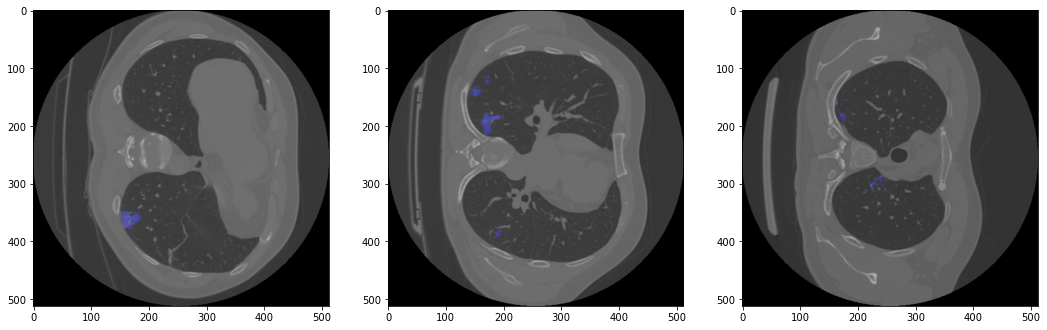

In [13]:
#Visualize some of the slices
from PIL import Image
import matplotlib.pyplot as plt

def blend(image, mask): # Функция возвращает картинку с наложенной на неё маской - label, которые являются ковидной штукой
    image = image.astype(np.float32)
    min_in = image.min()
    max_in = image.max()
    image = (image - min_in) / (max_in - min_in + 1e-8) * 255
    image = np.dstack((image, image, image)).astype(np.uint8)
    zeros = np.zeros_like(mask)
    mask = np.dstack((zeros, zeros, mask * 255)).astype(np.uint8)
    return Image.blend(
        Image.fromarray(image),
        Image.fromarray(mask),
        alpha=.3
    )

patient_num = 7
slices_num = (10, 20, 30)
slices = []
for idx in slices_num:
    slices.append(blend(
        images[patient_num][..., idx],
        labels[patient_num][..., idx]
    ))

figure = plt.figure(figsize=(18, 18))
for i, image in enumerate(slices):
    ax = figure.add_subplot(1, len(slices), i + 1)
    ax.imshow(slices[i])

In [14]:
"""
Write your code here

You need to:
 0. (Optional) Split your data into training and validation sets.
 1. Create batch generator
 2. Define and train your model using deep learning framework, e.g. PyTorch or Keras
"""

'\nWrite your code here\n\nYou need to:\n 0. (Optional) Split your data into training and validation sets.\n 1. Create batch generator\n 2. Define and train your model using deep learning framework, e.g. PyTorch or Keras\n'

In [15]:
!pip install -U albumentations

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import albumentations as A

In [ ]:
from sklearn.model_selection import train_test_split



X_train, X_val, y_train, y_val = train_test_split(images, labels, 
                                                    train_size=0.8, 
                                                    random_state=2021)

In [ ]:
transforms = A.Compose([
    # Гауссовый шум
    # A.GaussNoise(always_apply=False, p=0.5, var_limit=(105.69999694824219, 496.6399841308594)),
    # Отражение
    # A.Flip(always_apply=False, p=0.5),
    # Рандомное сжатие
    # A.GridDistortion(always_apply=False, p=0.5, num_steps=3, distort_limit=(-0.30000001192092896, 0.30000001192092896), interpolation=0, border_mode=0, value=(0, 0, 0), mask_value=None),
    # Отражение
    # A.HorizontalFlip(always_apply=False, p=0.5),
    # Блюр в движении (резкий поворот камеры)
    # A.MotionBlur(always_apply=False, p=0.5, blur_limit=(3, 9)),
    # Шум
    # A.MultiplicativeNoise(always_apply=False, p=0.5, multiplier=(0.8899999856948853, 1.1699999570846558), per_channel=True, elementwise=True),
    # Искажение
    # A.OpticalDistortion(always_apply=False, p=0.5, distort_limit=(-0.5, 0.5), shift_limit=(-0.05000000074505806, 0.05000000074505806), interpolation=0, border_mode=0, value=(0, 0, 0), mask_value=None),
    # Шум
    # A.RandomGamma(always_apply=False, p=0.5, gamma_limit=(80, 120), eps=1e-07),
    # Случайный поворот
    # A.VerticalFlip(always_apply=False, p=0.5)
    ]
)

In [ ]:
class CovidDataset(Dataset):
    def __init__(self, X_train, X_val, Y_train, Y_val, transforms):
        self.X_train = []
        self.X_val = []
        self.Y_train = []
        self.Y_val = []
        self.transforms = transforms

        print(torch.Tensor(X_train[0]).transpose(1, 2).transpose(0, 1)[0].shape)
        for ct in X_train:
            ct = torch.Tensor(ct)
            # .contiguous().view(ct.shape[2], ct.shape[1], ct.shape[0]).transpose(0, 1).transpose(1, 2)
            for sloy in ct.transpose(1, 2).transpose(0, 1):
                self.X_train.append(sloy)
        
        for ct in X_val:
            ct = torch.Tensor(ct)
            for sloy in ct.transpose(1, 2).transpose(0, 1):
                self.X_val.append(sloy)

        for ct in Y_train:
            ct = torch.Tensor(ct)
            for sloy in ct.transpose(1, 2).transpose(0, 1):
                self.Y_train.append(sloy)
        
        for ct in Y_val:
            ct = torch.Tensor(ct)
            for sloy in ct.transpose(1, 2).transpose(0, 1):
                self.Y_val.append(sloy)
        
    
    
    def __len__(self):
        return len(self.X_train)
    
    def __getitem__(self, idx):
        sl = self.transforms(image=self.X_train[idx].numpy(), label=self.Y_train[idx].numpy())
        return torch.Tensor([sl["image"]]), torch.Tensor([sl["label"]]) # Важно, нельзя передать просто картинку (512, 512), так как используется свёртка по многим измерениям. Необходимо передать в формате
                                            # [палитра, ширина, высота, номер картинки]

In [ ]:
batch_size = 4

dataset = CovidDataset(X_train, X_val, y_train, y_val, transforms)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [18]:
import torch
model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=1, out_channels=1, init_features=batch_size, pretrained=False)

Using cache found in /root/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master


In [6]:
import torch.nn as nn

class Unet(nn.Module):
    def block_down(self, in_features, out_features):
        return nn.Sequential(*[nn.Conv2d(in_features, out_features, (3, 3), padding=1),
                              nn.ReLU(),
                              nn.BatchNorm2d(out_features)])
    
    def block_up(self, in_features, out_features):
        return nn.Sequential(*[nn.Conv2d(in_features, out_features, (3, 3), padding=1),
                              nn.ReLU(),
                              nn.BatchNorm2d(out_features)])
    
    
    def __init__(self):
        super(Unet, self).__init__()
        self.block_up11 = self.block_down(1, 32)
        self.block_up12 = self.block_down(32, 32)
        self.max_pooling11 = nn.MaxPool2d((2, 2), stride=(2, 2))
        
        self.block_up21 = self.block_down(32, 64)
        self.block_up22 = self.block_down(64, 64)
        self.max_pooling22 = nn.MaxPool2d((2, 2), stride=(2, 2))
        
        self.block_up31 = self.block_down(64, 128)
        self.block_up32 = self.block_down(128, 128)
        self.max_pooling33 = nn.MaxPool2d((2, 2), stride=(2, 2))
        
        self.block_up41 = self.block_down(128, 256)
        self.block_up42 = self.block_down(256, 256)
        self.max_pooling44 = nn.MaxPool2d((2, 2), stride=(2, 2))
        
        self.block_up51 = self.block_down(256, 512)
        self.block_up52 = self.block_down(512, 512)
        
        self.block_up61 = nn.Upsample(scale_factor=2)
        self.block_up62 = self.block_up(512, 256)
        self.block_up63 = self.block_up(256, 256)
        self.block_up64 = self.block_up(256, 256)
        
        self.block_up71 = nn.Upsample(scale_factor=2)
        self.block_up72 = self.block_up(256, 128)
        self.block_up73 = self.block_up(128, 128)
        self.block_up74 = self.block_up(128, 128)
        
        self.block_up81 = nn.Upsample(scale_factor=2)
        self.block_up82 = self.block_up(128, 64)
        self.block_up83 = self.block_up(64, 64)
        self.block_up84 = self.block_up(64, 64)
        
        self.block_up91 = nn.Upsample(scale_factor=2)
        self.block_up92 = self.block_up(64, 32)
        self.block_up93 = self.block_up(32, 32)
        self.block_up94 = self.block_up(32, 32)
        
        self.block_up100 = self.block_up(32, 1)
        
    
    def forward(self, x):
        out = self.block_up11(x)
        out = self.block_up12(out)
        
        save1 = out.clone()
        
        out = self.max_pooling11(out)
        
        out = self.block_up21(out)
        out = self.block_up22(out)
        
        save2 = out.clone()
        
        out = self.max_pooling22(out)
        
        out = self.block_up31(out)
        out = self.block_up32(out)
        
        save3 = out.clone()
        
        out = self.max_pooling33(out)
        
        out = self.block_up41(out)
        out = self.block_up42(out)
        
        save4 = out.clone()
        
        out = self.max_pooling44(out)
        
        out = self.block_up51(out)
        out = self.block_up52(out)
        
        out = self.block_up61(out)
        out = self.block_up62(out)
        out = self.block_up63(out + save4)
        out = self.block_up64(out)
        
        out = self.block_up71(out)
        out = self.block_up72(out)
        out = self.block_up73(out + save3)
        out = self.block_up74(out)
        
        out = self.block_up81(out)
        out = self.block_up82(out)
        out = self.block_up83(out + save2)
        out = self.block_up84(out)
        
        out = self.block_up91(out)
        out = self.block_up92(out)
        out = self.block_up93(out + save1)
        out = self.block_up94(out)
        
        out = self.block_up100(out)
        
        return out       
        
        

In [19]:
import torch
import torch.nn.functional as F



def sigmoid_focal_loss(
    inputs: torch.Tensor,
    targets: torch.Tensor,
    alpha: float = 0.25,
    gamma: float = 2,
    reduction: str = "none"):
    """
    Original implementation from https://github.com/facebookresearch/fvcore/blob/master/fvcore/nn/focal_loss.py .
    Loss used in RetinaNet for dense detection: https://arxiv.org/abs/1708.02002.

    Args:
        inputs: A float tensor of arbitrary shape.
                The predictions for each example.
        targets: A float tensor with the same shape as inputs. Stores the binary
                classification label for each element in inputs
                (0 for the negative class and 1 for the positive class).
        alpha: (optional) Weighting factor in range (0,1) to balance
                positive vs negative examples or -1 for ignore. Default = 0.25
        gamma: Exponent of the modulating factor (1 - p_t) to
               balance easy vs hard examples.
        reduction: 'none' | 'mean' | 'sum'
                 'none': No reduction will be applied to the output.
                 'mean': The output will be averaged.
                 'sum': The output will be summed.
    Returns:
        Loss tensor with the reduction option applied.
    """
    p = torch.sigmoid(inputs)
    ce_loss = F.binary_cross_entropy_with_logits(
        inputs, targets, reduction="none"
    )
    p_t = p * targets + (1 - p) * (1 - targets)
    loss = ce_loss * ((1 - p_t) ** gamma)

    if alpha >= 0:
        alpha_t = alpha * targets + (1 - alpha) * (1 - targets)
        loss = alpha_t * loss

    if reduction == "mean":
        loss = loss.mean()
    elif reduction == "sum":
        loss = loss.sum()

    return loss


In [20]:
num_epoch = 25
lr = 0.01

optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = sigmoid_focal_loss

In [21]:
device = torch.device('cuda:0')

# model = model.to(device)

In [ ]:
epoch_amount = 5
losses = []

for epoch in tqdm(range(epoch_amount)):
    for X, Y in loader:
        # X = X.to(device)
        # Y = Y.to(device)

        optimizer.zero_grad()
        output = model(X)

        loss = criterion(output, Y, 0.25, 15, "mean")
        loss.backward()

        del X
        del Y
        torch.cuda.empty_cache()
        losses.append(loss)

  0%|          | 0/5 [00:00<?, ?it/s]

In [30]:
torch.save(model, "ct_detector.h5")

In [27]:
def blend2(image, mask): # Функция возвращает картинку с наложенной на неё маской - label, которые являются ковидной штукой
    # image = image.astype(np.float32)
    min_in = image.min()
    max_in = image.max()
    image = (image - min_in) / (max_in - min_in + 1e-8) * 255
    image = np.dstack((image, image, image)).astype(np.uint8)
    zeros = np.zeros_like(mask)
    mask = np.dstack((zeros, zeros, mask * 255)).astype(np.uint8)
    return Image.blend(
        Image.fromarray(image),
        Image.fromarray(mask),
        alpha=.3
    )

In [42]:
for patient in range(len(X_val)):
    for sloy in range(len(X_val[patient])):
        blend2(X_val[patient][..., sloy], y_val[patient][..., sloy])

IndexError: ignored

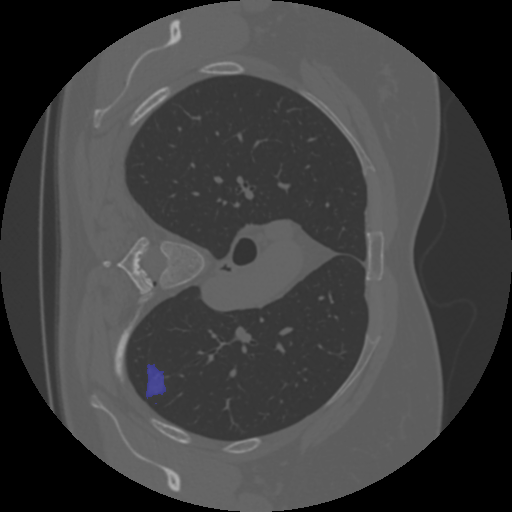

In [43]:
blend2(X_val[2][..., 25], y_val[2][..., 25])

In [65]:
output = model(torch.Tensor([[X_val[2][..., 25]], [X_val[2][..., 26]], [X_val[2][..., 27]], [X_val[2][..., 28]]]))
output

tensor([[[[0.3128, 0.3853, 0.3301,  ..., 0.3520, 0.3853, 0.3649],
          [0.1490, 0.3396, 0.2328,  ..., 0.2034, 0.4304, 0.3853],
          [0.2320, 0.3068, 0.3924,  ..., 0.0939, 0.3853, 0.3853],
          ...,
          [0.3474, 0.4799, 0.3029,  ..., 0.1973, 0.4127, 0.3853],
          [0.2108, 0.1758, 0.1133,  ..., 0.0415, 0.3853, 0.3853],
          [0.0379, 0.0433, 0.0217,  ..., 0.0776, 0.1575, 0.4132]]],


        [[[0.3128, 0.3853, 0.3301,  ..., 0.3520, 0.3853, 0.3649],
          [0.1490, 0.3396, 0.2328,  ..., 0.2034, 0.4304, 0.3853],
          [0.2320, 0.3068, 0.3924,  ..., 0.0939, 0.3853, 0.3853],
          ...,
          [0.3474, 0.4799, 0.3029,  ..., 0.1973, 0.4127, 0.3853],
          [0.2108, 0.1758, 0.1133,  ..., 0.0415, 0.3853, 0.3853],
          [0.0379, 0.0433, 0.0217,  ..., 0.0776, 0.1575, 0.4132]]],


        [[[0.3128, 0.3853, 0.3301,  ..., 0.3520, 0.3853, 0.3649],
          [0.1490, 0.3396, 0.2328,  ..., 0.2034, 0.4304, 0.3853],
          [0.2320, 0.3068, 0.3924,  ..

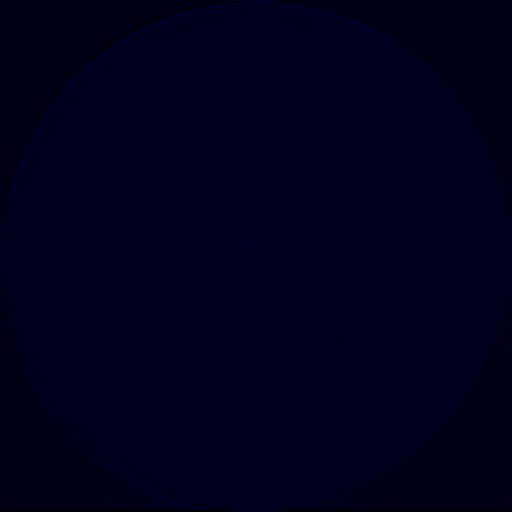

In [72]:
i = 0 # X_val[i][..., 25 + i]
blend2(torch.ones_like(torch.Tensor(X_val[i][..., 25 + i])), output[i][0].detach().numpy())

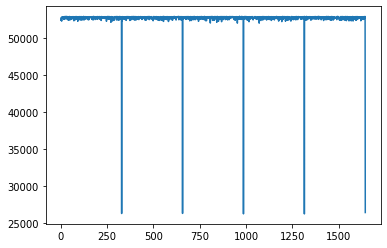

In [74]:
plt.plot(losses)

In [ ]:
"""
Load testing data into images and labels lists

images list consists of CT scans -  numpy arrays of shape (512, 512, n_slices)
"""
with open('testing_data.json', 'r') as f:
    dict_testing = json.load(f)

images_testig = []
for entry in tqdm(dict_testing):
    image = nib.load(os.path.join(path_images, entry['image']))
    images.append(image.get_fdata())

In [ ]:
"""
Write your code here

You need to:
 1. Predict labels for CT scans from images list
 2. Store them in the labels_predicted list in form of numpy arrays of shape (512, 512, n_slices), where:
    0 - background class
    1 - regions of consolidation class
"""
labels_predicted = []

In [ ]:
# Visualize some of the predictions

patient_num = 5
slices_num = (10, 20, 30)
slices = []
for idx in slices_num:
    slices.append(blend(
        images[patient_num][..., idx],
        labels_predicted[patient_num][..., idx]
    ))

figure = plt.figure(figsize=(18, 18))
for i, image in enumerate(slices):
    ax = figure.add_subplot(1, len(slices), i + 1)
    ax.imshow(slices[i])

In [ ]:
# Execute this cell for submission file generation 
import csv

def rle_encoding(x):
    dots = np.where(x.T.flatten() == 1)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if (b > prev + 1):
            run_lengths.extend((b + 1, 0))
        run_lengths[-1] += 1
        prev = b
    return [str(item) for item in run_lengths]

with open("submission.csv", "wt") as sb:
    submission_writer = csv.writer(sb, delimiter=',')
    submission_writer.writerow(["Id", "Predicted"])
    for idx, patient in tqdm(enumerate(labels_predicted)):
        submission_writer.writerow([
                f"{idx}",
                " ".join(rle_encoding(patient))
            ])